# Sprint 4 - Tasca 2  - Gemma Galver

## Exercicis 2 i 3

### Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

PRE-PROCESSING-DATA/movies.dat

Link: https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

#Per tal de que funcioni li hem d'afegir un altre barra "\"a cada part de l'adreça.
#Per tal de mirar com era la base de dades abans de començar a treballar amb ella, la he obert amb Bloc de notas
#i he observat que tenia un índex i dues columnes separades per "::".
#També he vist que les dades no tenien títol, de manera s'ha de crear.

ruta_arx = os.path.join("C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 4 T2\\movies.dat")
nom_columnes =["id","Movie","Genre"]
movie = pd.read_csv(ruta_arx, sep='\::',index_col=0,names=nom_columnes , encoding='latin-1',engine='python')
movie

#hem afegit el encoding="latin-1" perquè hi havia caràcters no reconeguts. Ha sortit una advertència
# hem afegit engine=python perquè ha aparegut una advertència que ens ho suggeria

,Movie,Genre
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


Observem que l'any d'estrena de la pel.lícula està en la mateixa columna que el titol. De manera que separarem la columna en dos.

In [2]:
# movie[["Title","Year"]]= movie["Movie"].str.split(" \(", n=1, expand=True)

#  "\(" --> No es podia fer per "(" només. Necessitava "\"
# n=1 significa que com a màxim hi haurà 1 separació
# expand=True --> significa que la separació es farà en 2 columnes. Si fos False es faria una separació en la mateixa columna.

# Ara hem de treure el ")" de darrera. El substituirem per ""
#movie["Year"] = movie["Year"].str.replace("\)", "", regex=True)
# regex=True --> 
#movie.drop(columns=["Movie"], inplace=True)


# L'ordre de les columnes ha canviat. De manera que ara hem de posarlo de nou en ordre
#movie=movie[["Title","Year","Genre"]]
#movie



Hi ha titols que porten "()". De manera que aquesta opció de separació donava molts errors de valors Nans que no eren reals. He hagut de tornar a enrera i buscar una sol.lució que tregui els 4 números que hi ha entre els "()". D'aquesta manera m'asseguro que no hi hagi errors.

In [3]:
movie["Year"] = movie["Movie"].str.extract(r"\((\d{4})\)")
movie["Movie"] = movie["Movie"].str.replace(r"\(\d{4}\)", "")
movie

# r és una rawstring, s'utilitza per indicar que els caràcters especials com en aquest cas "()" s'han d'interpretar literalment.
# \( ... \) s'utilitxen per representar el "()" literal
# (\d{4}) busca una cadena de 4 digits; d representa un digit del 0 al 9

C:\Users\gemma\AppData\Local\Temp\ipykernel_4316\2507076726.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie["Movie"] = movie["Movie"].str.replace(r"\(\d{4}\)", "")


,Movie,Genre,Year
id,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000


In [4]:
# fins ara el id estava considerat un index, però no una columna. Ara l'hem passat a columna

movie=movie.reset_index()
movie

,id,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


Ara seguirem els procesos de preparament de les dades:

- veurem el tipus de dades
- mirarem si hi ha duplicats
- mirarem si hi ha valors nulls i nans
- farem un petit anàlisis estadístic

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   Movie   3883 non-null   object
 2   Genre   3883 non-null   object
 3   Year    3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


Observem que "Year" està considerat un object. L'hem de canviar a int amb .astype()

In [6]:
movie["Year"]=movie["Year"].astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   Movie   3883 non-null   object
 2   Genre   3883 non-null   object
 3   Year    3883 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


In [7]:
# Una altra manera de fer-ho si dona error amb astype() és: pd.to_numeric()
#movie['Year'] = pd.to_numeric(movie['Year'], errors='coerce')

Mirem si hi ha valors duplicats amb **.drop.duplicates()**

In [8]:
movie.drop_duplicates()
movie.shape

(3883, 4)

Veiem que no hi ha duplicats

Mirem si hi ha NaNs

In [9]:
movie.isna().sum()

id       0
Movie    0
Genre    0
Year     0
dtype: int64

Ja hemo vist que no hi ha duplicats, ni valors not nulls ni nans. El proper pas que ens demana l'exercici és deixar només un sol gènere a cada pel.lícula. Com no hi ha cap criteri especificat. Deixarem el primer gènere que aparegui. S'ha de tenir en compte que l'ordre dels gèneres és alfabètic. De manera que això perjudica als gèneres que comencen per les lletres més baixes del abecedari.
La manera més justa seria poder contemplar totes les categories de cada pel.lícula a l'hora de fer l'anàlisis, tot i que seria una mica més complexe. Seria amb el mètode **.explode(nom_colum)** després d'haver passat tots els valors a llista. I el que faria és crear nous registres amb aquelles pel.lícules que tenien més d'un gènere.

movie["Genre"] = movie["Genre"].str.split('|')
movie_exploded = movie.explode("Genre")

Primer separarem els diferents gèneres. El separador que hi ha entre ells és "|". El convertirem en una llista de valors

In [10]:
movie["Genre"] = movie["Genre"].str.split('|')



# Ara escollirem la primera posició de la llista --> [0]

movie["Genre"] = movie.Genre.str[0].str.strip()
movie

,id,Movie,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


Ara ja tenim totes les dades preparades per a poder treballar amb elles. La última cosa que falta és pasar el gènere a categòrica i fer una petita estadística de les dades.

In [11]:
movie["Genre"] = movie["Genre"].astype('category')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      3883 non-null   int64   
 1   Movie   3883 non-null   object  
 2   Genre   3883 non-null   category
 3   Year    3883 non-null   int32   
dtypes: category(1), int32(1), int64(1), object(1)
memory usage: 80.4+ KB


In [12]:
# permet saber quines categories hi ha i el total de pel.lícules d'aquesta categoria.
movie["Genre"].value_counts()


Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Musical          25
Film-Noir        25
War              12
Fantasy           2
Name: Genre, dtype: int64

In [13]:
movie["Genre"].value_counts(normalize=True)
# permet saber el% de cada categoria respecte al total

Drama          0.302859
Comedy         0.263714
Action         0.129539
Horror         0.067474
Adventure      0.039918
Crime          0.033737
Documentary    0.031677
Thriller       0.026011
Animation      0.023178
Children's     0.022920
Romance        0.012877
Sci-Fi         0.011847
Mystery        0.009271
Western        0.008499
Musical        0.006438
Film-Noir      0.006438
War            0.003090
Fantasy        0.000515
Name: Genre, dtype: float64

In [14]:
movie["Genre"].describe()

count      3883
unique       18
top       Drama
freq       1176
Name: Genre, dtype: object

In [15]:
movie.describe()

,id,Year
count,3883.000000,3883.000000
mean,1986.049446,1986.066959
std,1146.778349,16.895690
min,1.000000,1919.000000
25%,982.500000,1982.000000
50%,2010.000000,1994.000000
75%,2980.500000,1997.000000
max,3952.000000,2000.000000


Ara ja tenim les dades preparades per al Exercici 3



### Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.


*Idees per als gràfics 
Un de barres de pel´licules per any
un de barres per tipus de pel.licules
un de calor per a quin tipus de pelis s'han fet en diferents franges d'anys


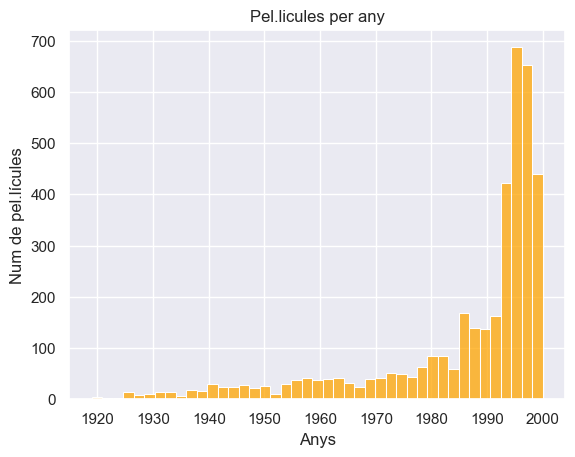

In [16]:
#sns.set() --> és un paquet de Seaborn que millora l'aparença de les gràfiques (molt recomanat)
sns.set()
sns.histplot(movie["Year"], color="orange")

plt.title("Pel.licules per any")
plt.xlabel("Anys")
plt.ylabel("Num de pel.lícules")

plt.show()

Com es pot observar al histograma. L'augment de la producció de pel.lícules ha estat constant, pero a partir de 1992 apriximadament el seu creixement es va duplicar. Cap a 1996 és el moment en el que més pel.lícules es van produir (gairebé 700). Però després va anar baixant la producció a nivells de 1994 aproximadament.

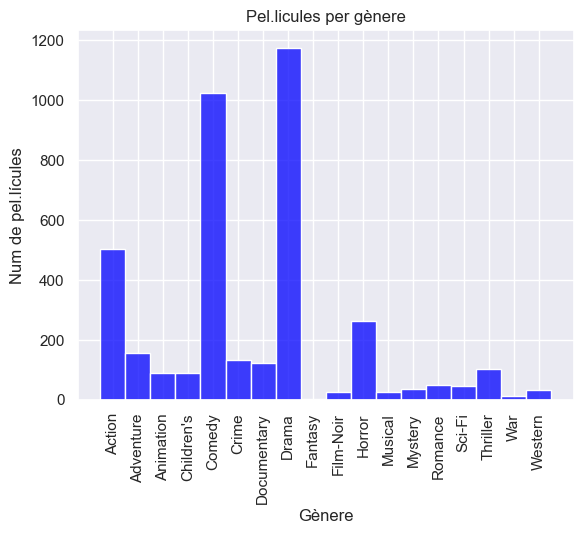

In [17]:
sns.set()
sns.histplot(movie["Genre"], color="blue")

plt.title("Pel.licules per gènere")
# Rotar les etiquetes del eix x 90 graus
plt.xticks(rotation=90)
plt.xlabel("Gènere")
plt.ylabel("Num de pel.lícules")

plt.show()

Des de 1917 fins al 2000 el gènero més produit és el Drama, seguidament de la Comèdia i el tercer però amb més diferència és el d'Acció. La resta no son tan significatius. 
Però cal dir que seria interessant saber quina ha estat la tendència al llarg dels anys de cada gènere i la seva evolució.

Per tal de veure quin gènere és el mes produit en cada any, farem un mapa de calor --> heatmap

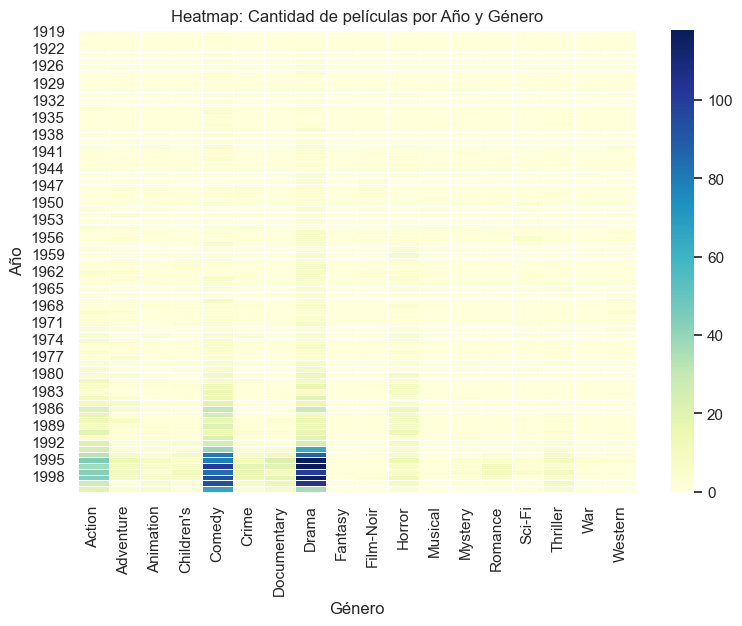

In [18]:
heatmap_data = movie.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Crear el heatmap utilizando Seaborn
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt='d', linewidths=0.5, ax=ax)
sns.set()
# Personalizar el heatmap
plt.title('Heatmap: Cantidad de películas por Año y Género')
plt.xlabel('Género')
plt.ylabel('Año')

# Mostrar el heatmap
plt.show()


Un cop fet el heatmat, veig que no és la millor opció per a representar les dades que volia. Crec que la millor opció és un boxplot.

C:\Users\gemma\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


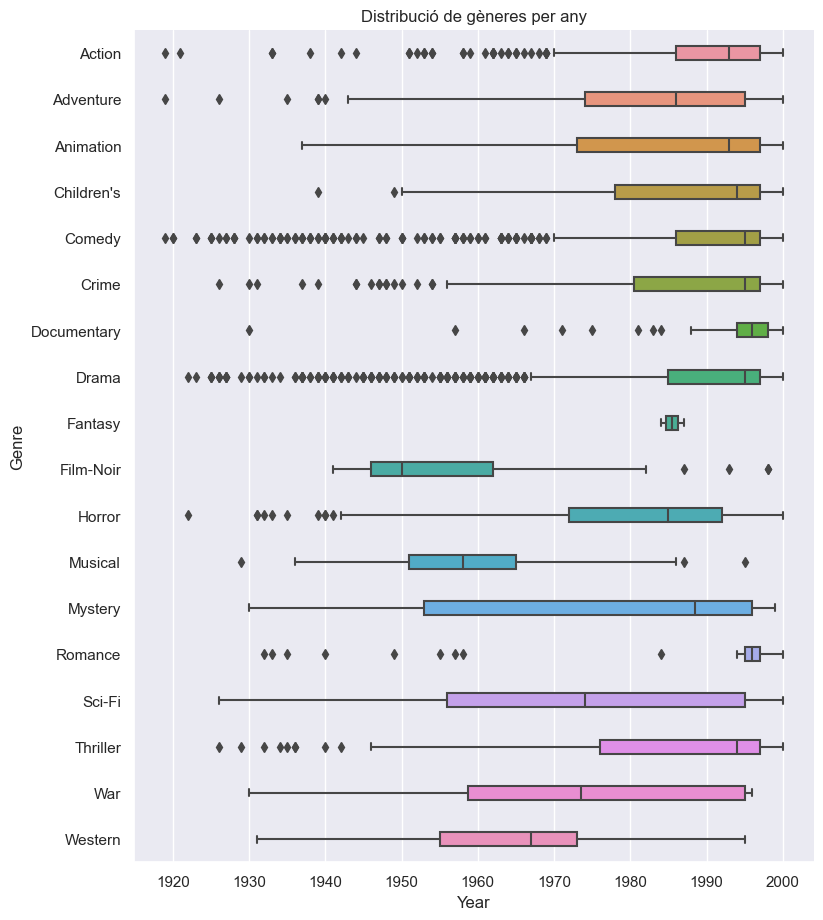

In [19]:
g = sns.catplot(data=movie, x="Year", y = "Genre", kind='box', fliersize=5,  width=0.3)
plt.title('Distribució de gèneres per any')
sns.set()
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
plt.show();

Aquest boxplot ens dona una bona idea de la distribució per gènere al llarg dels anys. Però m'agradaria una gràfica encara més enteneroda. Per això he decidit agrupar els anys en dècades per tal de veure quins son els gèneres més produits en cada dècada.Hem de tenir en compte que als "10s" nomñes hi ha pel.lícules de 1919 i als "00s" només hi ha pel.lícules del 2000.

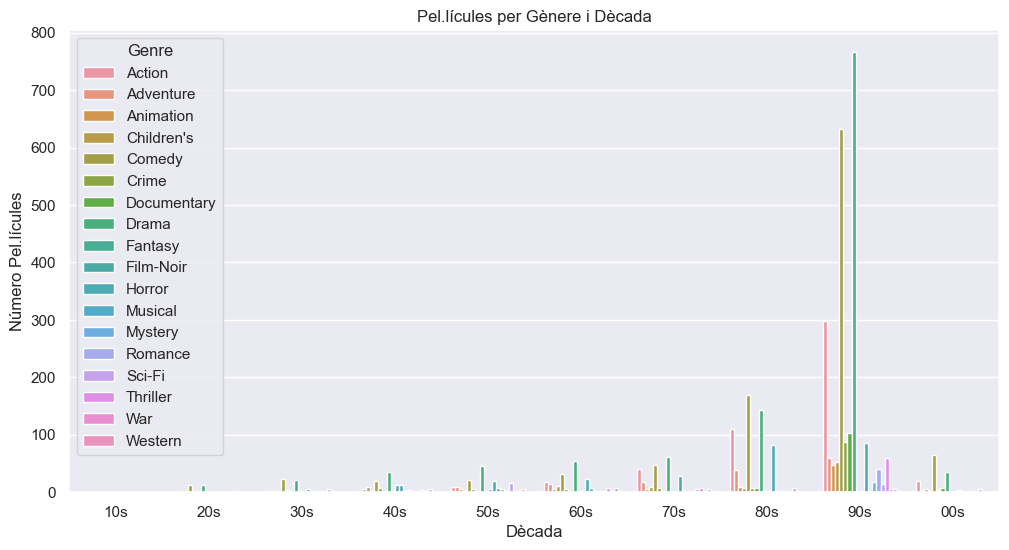

In [20]:
# Definim els intervals de cada dècada. S'ha de tenir en compte que a la dècada dels 10 només hi ha un any.
decade_bins = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
decade_labels = ["10s", "20s","30s", "40s","50s", "60s", "70s", "80s", "90s","00s"]

# Creem una nova columna per a poder agrupar més endavant per dècades(dècada a la que pertany cada any)
movie["Decade"] = pd.cut(movie["Year"], bins=decade_bins, labels=decade_labels, right=False)
# pd.cut --> divideix els valors numèrics en intervals i els hi assigna etiquetes

# Agrupem  "Decade" i "Genre" per contar quantes pel.lícules hi ha per gènere i dècada creant la columna "Num_movies"
grouped_data = movie.groupby(["Decade", "Genre"])["Movie"].count().reset_index(name='Num_movies')

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Decade", y="Num_movies", hue="Genre")

plt.title("Pel.lícules per Gènere i Dècada")
plt.xlabel("Dècada")
plt.ylabel("Número Pel.lícules")

# Mostrar el gráfico de barras
plt.show()



In [21]:
# Encontrar el género más producido en cada década
# most_produced_genres = grouped_data.groupby('Decade').apply(lambda x: x.loc[x['Numero de peliculas'].idxmax()])

Amb aquesta gràfica podem veure més detingudament quin son els gèneres més produits en cada dècada.